In [3]:
import kagglehub
import pandas as pd

def download_titanic():
  path = kagglehub.dataset_download("yasserh/titanic-dataset")

  # Herunterladen des Datensatzes aus dem öffentlich verfügbaren Repository.
  titanic = pd.read_csv(
      path+"/Titanic-Dataset.csv")

  return titanic

titanic = download_titanic()
# Anzeigen der ersten Zeilen des Datensatzes.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import kagglehub
import pandas as pd
import numpy as np

titanic.replace('NaN', np.nan, inplace=True)

titanic = titanic.drop(['PassengerId', 'Name'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import numpy as np

# Ersetzen der NaN strings mit np.NaN zur konsistenten Verarbeitung von NaN.
titanic.replace('NaN', np.nan, inplace=True)

print(f"Von {len(titanic)}:")
# Prüfen welche Spalten wie oft keinen Wert haben.
print(titanic.isnull().sum())

Von 891:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [6]:
# Crew haben das Ticket LINE, damit sie gleichermaßen verarbeitet werden können
# wird 0 angehängt.
titanic['Ticket'] = titanic['Ticket'].replace('LINE', 'LINE 0')

# Extrahieren der Numerischen und Prefix Komponente.
ticket_info = titanic['Ticket'].str.extract(r'^(.*?)(\d+)$')
ticket_info = ticket_info.fillna('')

titanic['Prefix'] = ticket_info[0]
titanic['Prefix'] = titanic['Prefix'].replace('', np.nan)

titanic['Ticket'] = ticket_info[1].astype(str)
titanic['Ticket'] = titanic['Ticket'].replace('', np.nan)

# Konvertieren zu numerischen Werten.
titanic['Ticket'] = pd.to_numeric(titanic['Ticket'], errors='coerce')

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,0,3,male,22.0,1,0,21171,7.2500,NaN,S,A/5
1,1,1,female,38.0,1,0,17599,71.2833,C85,C,PC
2,1,3,female,26.0,0,0,3101282,7.9250,NaN,S,STON/O2.
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,NaN
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [7]:
import pandas as pd
import re

cabin_info = titanic['Cabin'].str.extract(r'^(.?)(\d+)$')
cabin_info = cabin_info.fillna('')

# Da sich das Merkmal Cabin in zwei Komponenten teilen lässt, wird dies hier gemacht.
titanic[['Deck', 'Cabin']] = cabin_info
titanic['Cabin'] = titanic['Cabin'].replace('', np.nan)
titanic['Deck'] = titanic['Deck'].replace('', np.nan)
titanic['Cabin'] = pd.to_numeric(titanic['Cabin'], errors='coerce')

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
0,0,3,male,22.0,1,0,21171,7.2500,NaN,S,A/5,NaN
1,1,1,female,38.0,1,0,17599,71.2833,85.0,C,PC,C
2,1,3,female,26.0,0,0,3101282,7.9250,NaN,S,STON/O2.,NaN
3,1,1,female,35.0,1,0,113803,53.1000,123.0,S,NaN,C
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [8]:
from sklearn.model_selection import train_test_split

titanic = titanic.sample(frac=1)

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Der Datensatz muss jetzt aufgeteilt werden, um Datenlecks zu vermeiden.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Trainingset size:", len(X_train))
print("Validierungsset size:", len(X_valid))
print("Testset size:", len(X_test))

Trainingset size: 640
Validierungsset size: 72
Testset size: 179


In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)

cols_for_imputation = ['Age', 'Ticket', 'Fare', 'Parch', 'SibSp', 'Pclass']

# Das Training erfolgt ausschließlich am Trainingsdatensatz!
X_train_imputed = imputer.fit_transform(X_train[cols_for_imputation])
X_valid_imputed = imputer.transform(X_valid[cols_for_imputation])
X_test_imputed = imputer.transform(X_test[cols_for_imputation])

X_train[cols_for_imputation] = X_train_imputed
X_valid[cols_for_imputation] = X_valid_imputed
X_test[cols_for_imputation] = X_test_imputed

print("Von "+str(len(X_train))+ ":")
print(X_train.isnull().sum())

Von 640:
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       512
Embarked      0
Prefix      473
Deck        512
dtype: int64


In [10]:
titanic['Deck'] = titanic['Deck'].replace(np.nan, 'Unknown')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
208,1,3,female,16.0,0,0,367231,7.75,NaN,Q,NaN,Unknown
592,0,3,male,47.0,0,0,3902,7.25,NaN,S,A/5,Unknown
671,0,1,male,31.0,1,0,12750,52.00,71.0,S,F.C.,B
148,0,2,male,36.5,0,2,230080,26.00,2.0,S,NaN,F
676,0,3,male,24.5,0,0,342826,8.05,NaN,S,NaN,Unknown


In [11]:
from sklearn.impute import SimpleImputer

# Imputation der fehlenden Werte
numerical_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(exclude=np.number).columns

# Numerische Spalten mit dem Mittelwert imputieren
numerical_imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = numerical_imputer.transform(X_valid[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# Kategorische Spalten mit dem häufigsten Wert imputieren
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_valid[categorical_cols] = categorical_imputer.transform(X_valid[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Prüfen, ob noch fehlende Werte vorhanden sind
print("\nNach der Imputation:")
print(X_train.isnull().sum())


Nach der Imputation:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Prefix      0
Deck        0
dtype: int64


In [12]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
384,3.0,male,27.167623,0.0,0.0,349227.0,7.8958,50.859375,S,PC,C
172,3.0,female,1.000000,1.0,1.0,347742.0,11.1333,50.859375,S,PC,C
728,2.0,male,25.000000,1.0,0.0,236853.0,26.0000,50.859375,S,PC,C
652,3.0,male,21.000000,0.0,0.0,8475.0,8.4333,50.859375,S,PC,C
9,2.0,female,14.000000,1.0,0.0,237736.0,30.0708,50.859375,C,PC,C


In [13]:
sex_mapping = {'male': 0, 'female': 1}

# Anwenden der Umwandlung.
X_train['Sex'] = X_train['Sex'].map(sex_mapping)
X_valid['Sex'] = X_valid['Sex'].map(sex_mapping)
X_test['Sex'] = X_test['Sex'].map(sex_mapping)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
384,3.0,0,27.167623,0.0,0.0,349227.0,7.8958,50.859375,S,PC,C
172,3.0,1,1.000000,1.0,1.0,347742.0,11.1333,50.859375,S,PC,C
728,2.0,0,25.000000,1.0,0.0,236853.0,26.0000,50.859375,S,PC,C
652,3.0,0,21.000000,0.0,0.0,8475.0,8.4333,50.859375,S,PC,C
9,2.0,1,14.000000,1.0,0.0,237736.0,30.0708,50.859375,C,PC,C


In [14]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

# Enkodieren des Merkmals.
X_train['Pclass'] = encoder.fit_transform(X_train[['Pclass']])
X_valid['Pclass'] = encoder.transform(X_valid[['Pclass']])
X_test['Pclass'] = encoder.transform(X_test[['Pclass']])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
384,2.0,0,27.167623,0.0,0.0,349227.0,7.8958,50.859375,S,PC,C
172,2.0,1,1.000000,1.0,1.0,347742.0,11.1333,50.859375,S,PC,C
728,1.0,0,25.000000,1.0,0.0,236853.0,26.0000,50.859375,S,PC,C
652,2.0,0,21.000000,0.0,0.0,8475.0,8.4333,50.859375,S,PC,C
9,1.0,1,14.000000,1.0,0.0,237736.0,30.0708,50.859375,C,PC,C


In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Trainieren des Encoders
encoder.fit(X_train[['Embarked', 'Deck']])

# Anwenden des Encoders auf die Daten
encoded_cols_train = encoder.transform(X_train[['Embarked', 'Deck']])
encoded_cols_valid = encoder.transform(X_valid[['Embarked', 'Deck']])
encoded_cols_test = encoder.transform(X_test[['Embarked', 'Deck']])

# Erstellen der Spalten.
encoded_feature_names = encoder.get_feature_names_out(['Embarked', 'Deck'])
encoded_train_df = pd.DataFrame(encoded_cols_train, columns=encoded_feature_names, index=X_train.index)
encoded_valid_df = pd.DataFrame(encoded_cols_valid, columns=encoded_feature_names, index=X_valid.index)
encoded_test_df = pd.DataFrame(encoded_cols_test, columns=encoded_feature_names, index=X_test.index)

# Zusammenführen der DataFrames.
X_train = pd.concat([X_train.drop(['Embarked', 'Deck'], axis=1), encoded_train_df], axis=1)
X_valid = pd.concat([X_valid.drop(['Embarked', 'Deck'], axis=1), encoded_valid_df], axis=1)
X_test = pd.concat([X_test.drop(['Embarked', 'Deck'], axis=1), encoded_test_df], axis=1)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
384,2.0,0,27.167623,0.0,0.0,349227.0,7.8958,50.859375,PC,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
172,2.0,1,1.000000,1.0,1.0,347742.0,11.1333,50.859375,PC,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
728,1.0,0,25.000000,1.0,0.0,236853.0,26.0000,50.859375,PC,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
652,2.0,0,21.000000,0.0,0.0,8475.0,8.4333,50.859375,PC,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1.0,1,14.000000,1.0,0.0,237736.0,30.0708,50.859375,PC,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.preprocessing import TargetEncoder

encoder = TargetEncoder()

X_train['Prefix'] = encoder.fit_transform(X_train[['Prefix']], y_train)

X_valid['Prefix'] = encoder.transform(X_valid[['Prefix']])
X_test['Prefix'] = encoder.transform(X_test[['Prefix']])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
384,2.0,0,27.167623,0.0,0.0,349227.0,7.8958,50.859375,0.409272,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
172,2.0,1,1.000000,1.0,1.0,347742.0,11.1333,50.859375,0.408719,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
728,1.0,0,25.000000,1.0,0.0,236853.0,26.0000,50.859375,0.405696,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
652,2.0,0,21.000000,0.0,0.0,8475.0,8.4333,50.859375,0.405696,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1.0,1,14.000000,1.0,0.0,237736.0,30.0708,50.859375,0.409272,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


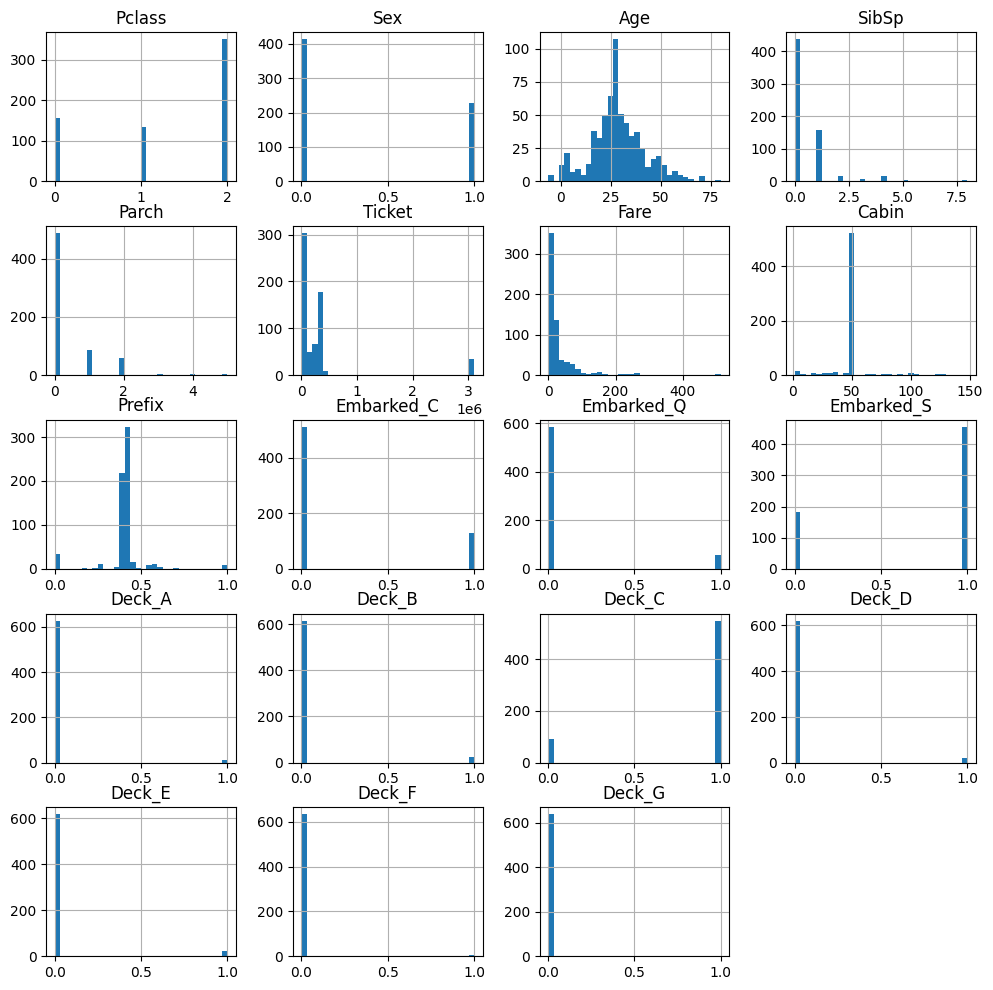

In [17]:
import matplotlib.pyplot as plt

X_train.hist(bins=32, figsize=(12,12))
plt.show()

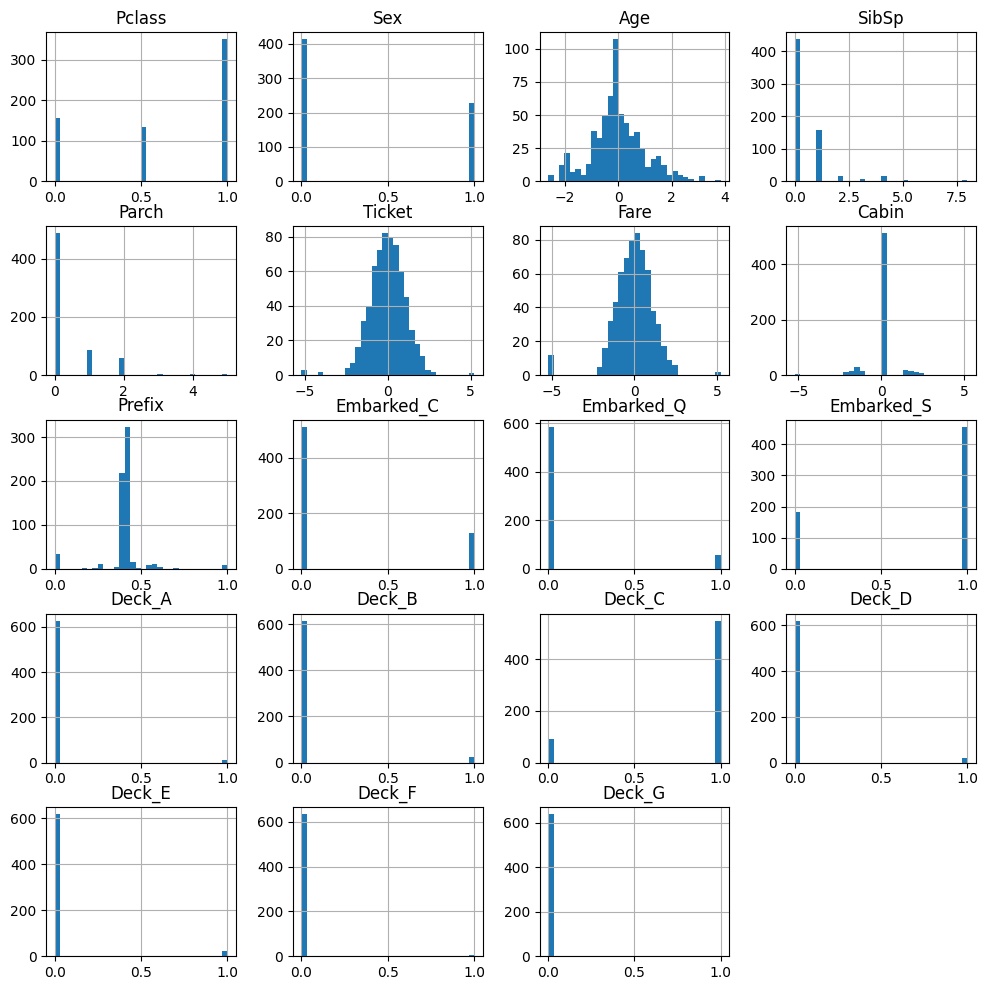

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

scaler_age = StandardScaler()
scaler_pclass = MinMaxScaler()
scaler_parch = RobustScaler()
scaler_sibsp = RobustScaler()
scaler_ticket_cabin = QuantileTransformer(output_distribution='normal',n_quantiles=128) # Example, adjust as needed

X_train['Age'] = scaler_age.fit_transform(X_train[['Age']])
X_train['Pclass'] = scaler_pclass.fit_transform(X_train[['Pclass']])
X_train['Parch'] = scaler_parch.fit_transform(X_train[['Parch']])
X_train['SibSp'] = scaler_sibsp.fit_transform(X_train[['SibSp']])
X_train[['Ticket', 'Cabin', 'Fare']] = scaler_ticket_cabin.fit_transform(X_train[['Ticket', 'Cabin', 'Fare']])

def apply_scaler(X):
  X['Age'] = scaler_age.transform(X[['Age']])
  X['Pclass'] = scaler_pclass.transform(X[['Pclass']])
  X['Parch'] = scaler_parch.transform(X[['Parch']])
  X['SibSp'] = scaler_sibsp.transform(X[['SibSp']])
  X[['Ticket', 'Cabin', 'Fare']] = scaler_ticket_cabin.transform(X[['Ticket', 'Cabin', 'Fare']])
  return X

X_valid = apply_scaler(X_valid)
X_test = apply_scaler(X_test)

X_train.hist(bins=32, figsize=(12,12))
plt.show()